# Trending of sentimental Analysis

[nltk_data] Downloading package vader_lexicon to /home/ak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mean Squared Error (MSE): 1.003468774437864e-31
R^2 Score: 1.0
Coefficients: [ 2.23838191e-19 -5.55111512e-17  1.00000000e+00]
Intercept: 4.996003610813204e-16


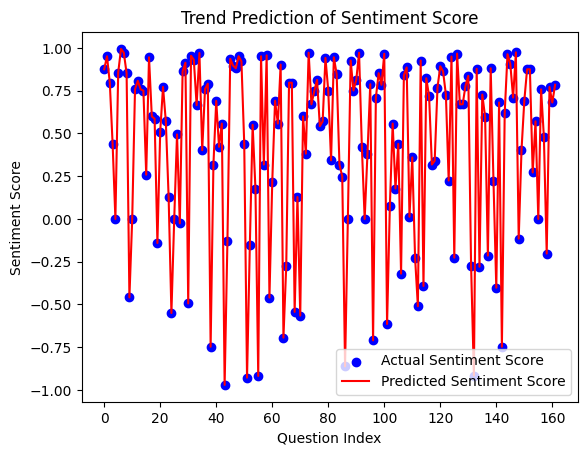

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download VADER Sentiment Analyzer if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Load the data
file_path = 'analysis.csv'  # Provide the correct path to your CSV file
df = pd.read_csv(file_path)

# Step 2: Feature Extraction
# Feature 1: Length of the answer (word count)
df['answer_length'] = df['answer'].apply(lambda x: len(str(x).split()))

# Feature 2: Length of the question (word count)
df['question_length'] = df['question'].apply(lambda x: len(str(x).split()))

# Feature 3: Sentiment Score from Feedback
df['sentiment_score'] = df['feedback'].apply(lambda feedback: sia.polarity_scores(str(feedback))['compound'])

# Step 3: Prepare the data for Linear Regression
X = df[['answer_length', 'question_length', 'sentiment_score']]  # Features (answer length, question length, sentiment score)
y = df['sentiment_score']  # Target (sentiment score as a proxy for feedback quality)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = regressor.predict(X_test)

# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

# Display the coefficients for interpretability
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Optional: Trend Prediction (Plotting Actual vs. Predicted Sentiment Scores)
df['question_index'] = np.arange(len(df))  # Create an index for plotting
plt.scatter(df['question_index'], df['sentiment_score'], color='blue', label='Actual Sentiment Score')
plt.plot(df['question_index'], regressor.predict(X), color='red', label='Predicted Sentiment Score')

plt.xlabel('Question Index')
plt.ylabel('Sentiment Score')
plt.title('Trend Prediction of Sentiment Score')
plt.legend()
plt.show()


[nltk_data] Downloading package vader_lexicon to /home/ak/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mean Squared Error (MSE): 1.003468774437864e-31
R^2 Score: 1.0
Coefficients: [ 2.23838191e-19 -5.55111512e-17  1.00000000e+00]
Intercept: 4.996003610813204e-16


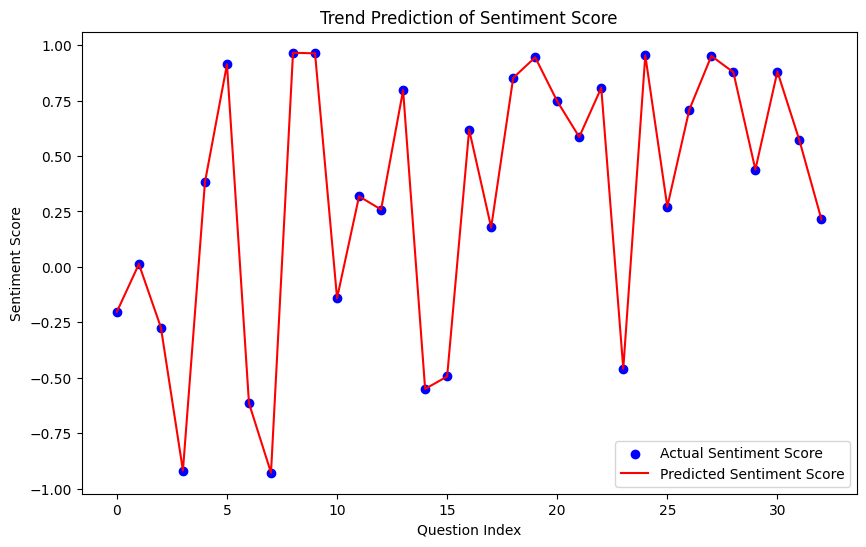

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

# Download VADER if not already done
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Step 1: Load the data
file_path = 'analysis.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Step 2: Feature Extraction
# Feature 1: Length of the answer (word count)
df['answer_length'] = df['answer'].apply(lambda x: len(x.split()))

# Feature 2: Length of the question (word count)
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

# Feature 3: Sentiment Score from Feedback (Using VADER)
df['sentiment_score'] = df['feedback'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 3: Prepare the data for Linear Regression
X = df[['answer_length', 'question_length', 'sentiment_score']]  # Features
y = df['sentiment_score']  # Target (predicting sentiment score as well)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics and model coefficients
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

# Step 6: Trend Prediction Visualization
# Visualizing actual vs. predicted sentiment scores for the test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Sentiment Score')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Sentiment Score')
plt.title('Trend Prediction of Sentiment Score')
plt.xlabel('Question Index')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


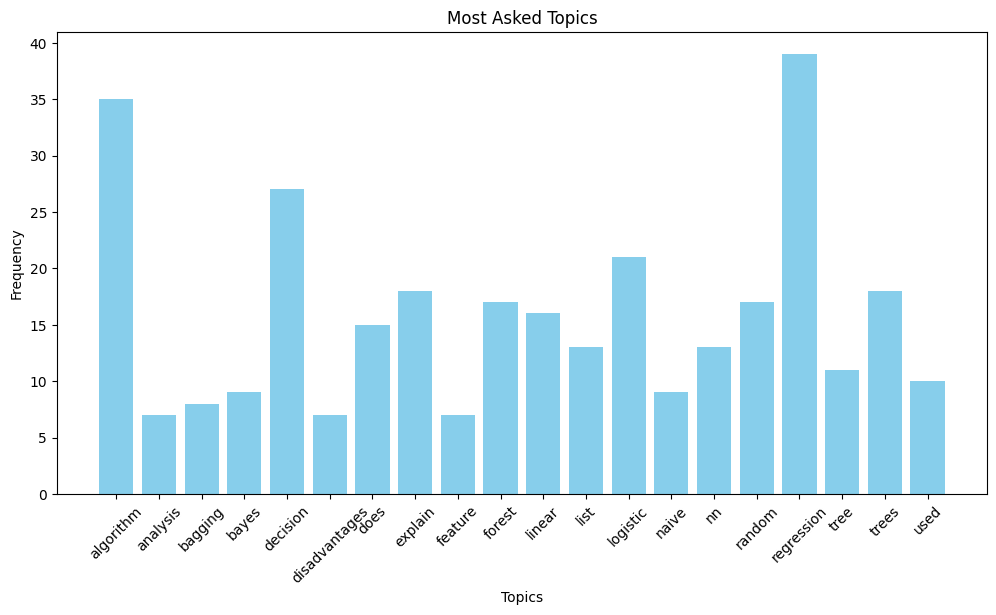

/tmp/ipykernel_11501/645202266.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topic_trend = df.groupby(['month']).apply(lambda x: vectorizer.transform(x['question']).toarray().sum(axis=0))


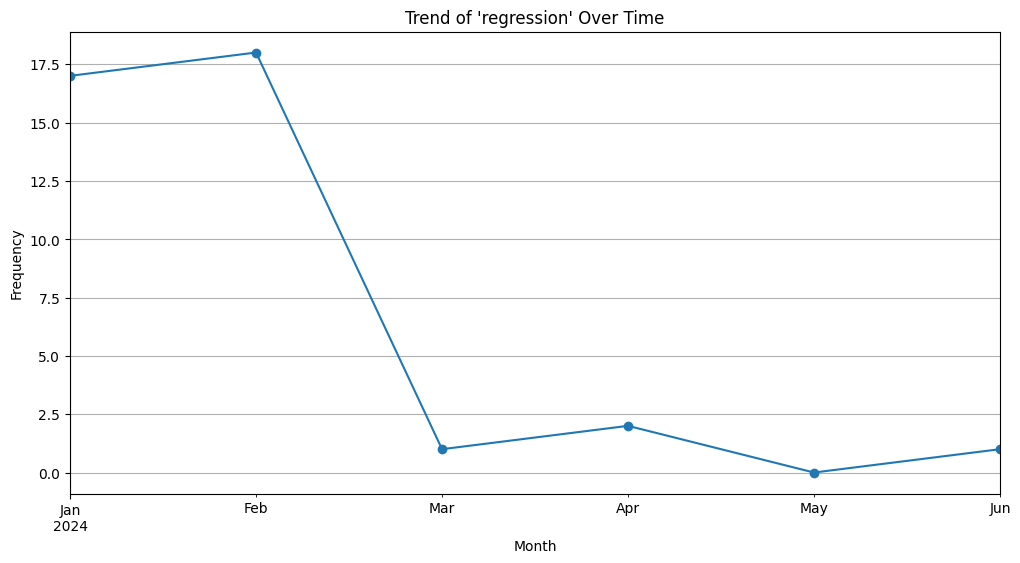

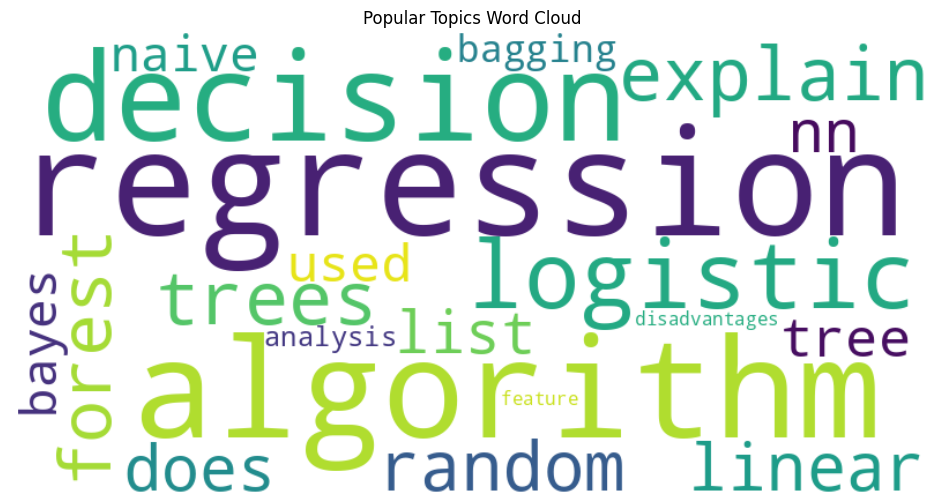

In [7]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Load the data
file_path = 'analysis.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Step 2: Extract Topics from Questions (Using Simple Keyword Extraction)
# You can improve this using advanced NLP models for topic extraction
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 keywords
X = vectorizer.fit_transform(df['question'])
keywords = vectorizer.get_feature_names_out()

# Count the frequency of each keyword
keyword_counts = X.toarray().sum(axis=0)
keyword_freq = dict(zip(keywords, keyword_counts))

# Step 3: Visualize the Most Asked Topics
plt.figure(figsize=(12, 6))
plt.bar(keyword_freq.keys(), keyword_freq.values(), color='skyblue')
plt.title('Most Asked Topics')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Step 4: Identify and Visualize Trending Topics Over Time
# Assuming there's a 'date' column in the CSV file with the timestamp of each question
# If not, we can randomly generate dates for the purpose of demonstration.
df['date'] = pd.date_range(start='2024-01-01', periods=len(df))

# Group by month and count the frequency of topics
df['month'] = df['date'].dt.to_period('M')
topic_trend = df.groupby(['month']).apply(lambda x: vectorizer.transform(x['question']).toarray().sum(axis=0))

# Plot the trend of a specific topic
topic_index = keywords.tolist().index('regression')  # Example topic: 'regression'
topic_trend_over_time = topic_trend.apply(lambda x: x[topic_index])

plt.figure(figsize=(12, 6))
topic_trend_over_time.plot(kind='line', marker='o')
plt.title(f"Trend of '{keywords[topic_index]}' Over Time")
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Generate a Word Cloud for Popular Topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Topics Word Cloud')
plt.show()


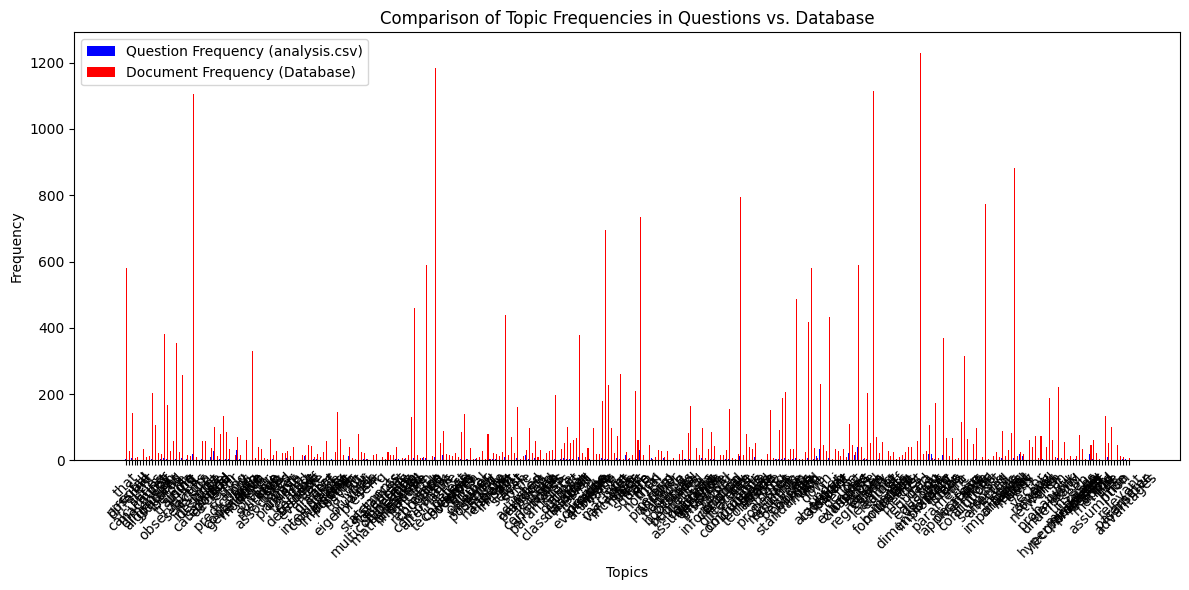

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from collections import Counter
import re

# Database configuration
POSTGRES_CONFIG = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "Prayarth7@",
    "host": "localhost",
    "port": "5432",
}

# Step 1: Load the analysis.csv file
df = pd.read_csv("analysis.csv")

# Step 2: Extract keywords from questions (basic approach)
def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    # Basic filtering to exclude stop words and focus on technical terms
    stop_words = set(["what", "is", "the", "of", "a", "in", "and", "for", "to"])
    keywords = [word for word in words if word not in stop_words]
    return keywords

# Extract keywords from all questions
all_keywords = []
for question in df["question"]:
    all_keywords.extend(extract_keywords(question))

# Count the frequency of each keyword in the analysis.csv file
question_keyword_freq = Counter(all_keywords)

# Step 3: Connect to PostgreSQL and fetch document counts
def fetch_document_counts():
    document_keyword_freq = Counter()
    try:
        conn = psycopg2.connect(**POSTGRES_CONFIG)
        cursor = conn.cursor()
        
        # Query to fetch all texts from the database and extract keywords
        cursor.execute("SELECT text FROM document_embeddings")
        rows = cursor.fetchall()
        
        for row in rows:
            document_text = row[0]
            document_keywords = extract_keywords(document_text)
            document_keyword_freq.update(document_keywords)

    except Exception as e:
        print("Error connecting to database:", e)
    finally:
        if conn:
            cursor.close()
            conn.close()
    
    return document_keyword_freq

# Fetch document keyword frequency from PostgreSQL
document_keyword_freq = fetch_document_counts()

# Step 4: Prepare data for plotting
common_topics = set(question_keyword_freq.keys()).intersection(document_keyword_freq.keys())
question_freq = [question_keyword_freq[topic] for topic in common_topics]
document_freq = [document_keyword_freq[topic] for topic in common_topics]

# Step 5: Plot the comparative bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(common_topics))

plt.bar(index, question_freq, bar_width, color='blue', label='Question Frequency (analysis.csv)')
plt.bar([i + bar_width for i in index], document_freq, bar_width, color='red', label='Document Frequency (Database)')

plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Comparison of Topic Frequencies in Questions vs. Database')
plt.xticks([i + bar_width / 2 for i in index], list(common_topics), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


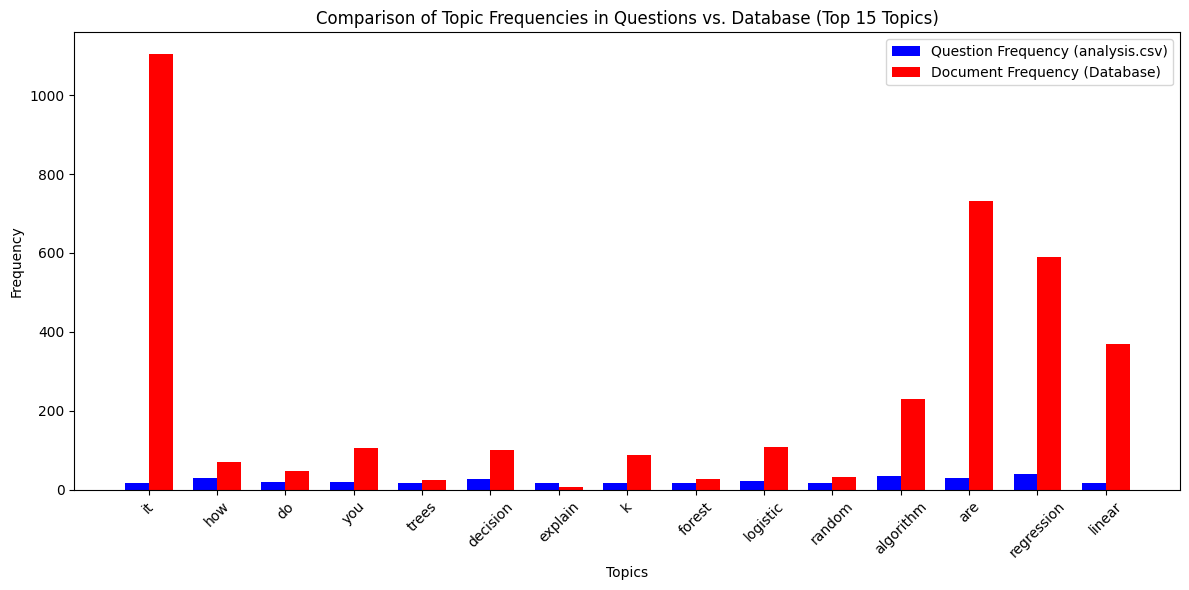

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from collections import Counter
import re

# Database configuration
POSTGRES_CONFIG = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "Prayarth7@",
    "host": "localhost",
    "port": "5432",
}

# Step 1: Load the analysis.csv file
df = pd.read_csv("analysis.csv")

# Step 2: Extract keywords from questions (basic approach)
def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    # Basic filtering to exclude stop words and focus on technical terms
    stop_words = set(["what", "is", "the", "of", "a", "in", "and", "for", "to"])
    keywords = [word for word in words if word not in stop_words]
    return keywords

# Extract keywords from all questions
all_keywords = []
for question in df["question"]:
    all_keywords.extend(extract_keywords(question))

# Count the frequency of each keyword in the analysis.csv file
question_keyword_freq = Counter(all_keywords)

# Step 3: Connect to PostgreSQL and fetch document counts
def fetch_document_counts():
    document_keyword_freq = Counter()
    try:
        conn = psycopg2.connect(**POSTGRES_CONFIG)
        cursor = conn.cursor()
        
        # Query to fetch all texts from the database and extract keywords
        cursor.execute("SELECT text FROM document_embeddings")
        rows = cursor.fetchall()
        
        for row in rows:
            document_text = row[0]
            document_keywords = extract_keywords(document_text)
            document_keyword_freq.update(document_keywords)

    except Exception as e:
        print("Error connecting to database:", e)
    finally:
        if conn:
            cursor.close()
            conn.close()
    
    return document_keyword_freq

# Fetch document keyword frequency from PostgreSQL
document_keyword_freq = fetch_document_counts()

# Step 4: Get the top 15 most common topics from question keywords
top_15_topics = dict(question_keyword_freq.most_common(15))

# Step 5: Prepare data for plotting
common_topics = set(top_15_topics.keys()).intersection(document_keyword_freq.keys())
question_freq = [top_15_topics[topic] for topic in common_topics]
document_freq = [document_keyword_freq[topic] for topic in common_topics]

# Step 6: Plot the comparative bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(common_topics))

plt.bar(index, question_freq, bar_width, color='blue', label='Question Frequency (analysis.csv)')
plt.bar([i + bar_width for i in index], document_freq, bar_width, color='red', label='Document Frequency (Database)')

plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Comparison of Topic Frequencies in Questions vs. Database (Top 15 Topics)')
plt.xticks([i + bar_width / 2 for i in index], list(common_topics), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Error connecting to database: 'CountVectorizer' object has no attribute 'stop_words_'


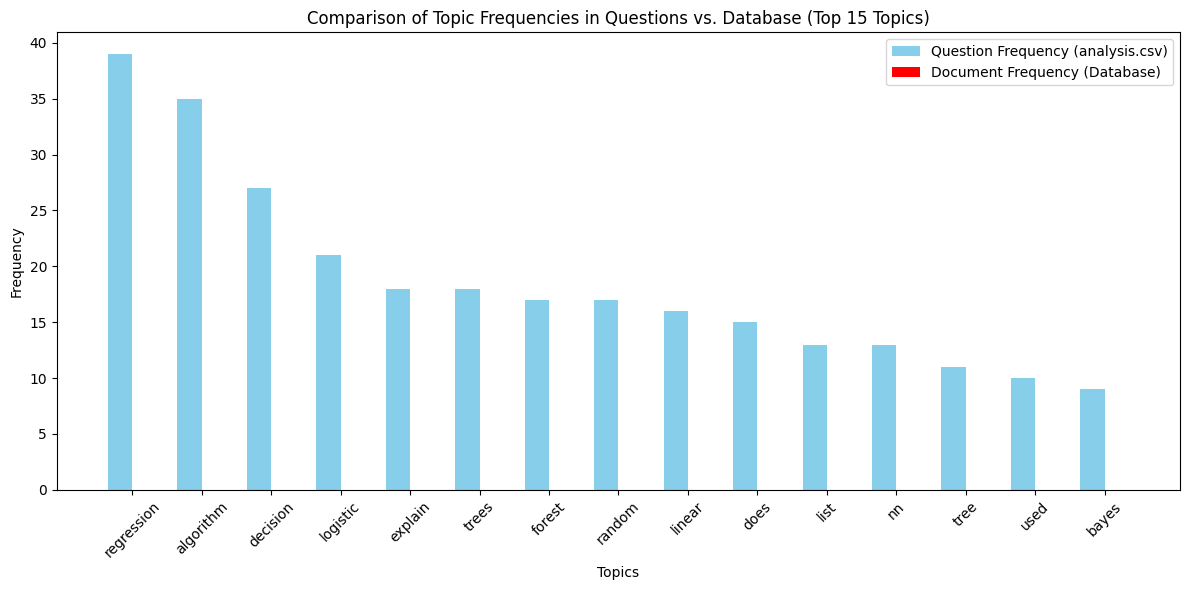

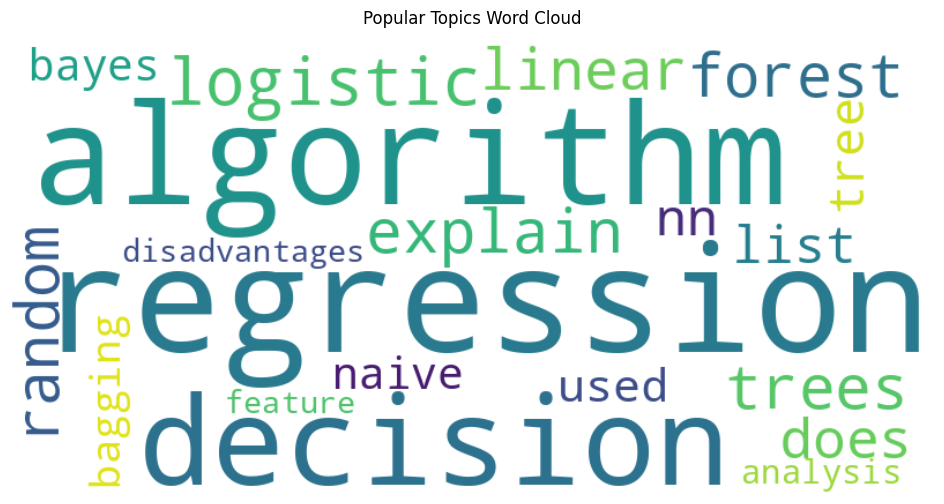

In [13]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import psycopg2
import re

# Database configuration
POSTGRES_CONFIG = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "Prayarth7@",
    "host": "localhost",
    "port": "5432",
}

# Step 1: Load the analysis.csv data
file_path = 'analysis.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Step 2: Extract Topics from Questions (Using Simple Keyword Extraction)
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 keywords
X = vectorizer.fit_transform(df['question'])
keywords = vectorizer.get_feature_names_out()

# Count the frequency of each keyword
keyword_counts = X.toarray().sum(axis=0)
keyword_freq = dict(zip(keywords, keyword_counts))

# Step 3: Fetch document-related counts from the PostgreSQL database
def fetch_document_counts():
    document_keyword_freq = Counter()
    try:
        conn = psycopg2.connect(**POSTGRES_CONFIG)
        cursor = conn.cursor()

        # Query to fetch all texts from the database and extract keywords
        cursor.execute("SELECT text FROM document_embeddings")
        rows = cursor.fetchall()

        # Extract keywords from each document text and update frequency counter
        for row in rows:
            document_text = row[0]
            document_keywords = re.findall(r'\b\w+\b', document_text.lower())  # Extract words
            document_keywords = [word for word in document_keywords if word not in vectorizer.stop_words_]  # Exclude stopwords
            document_keyword_freq.update(document_keywords)

    except Exception as e:
        print("Error connecting to database:", e)
    finally:
        if conn:
            cursor.close()
            conn.close()

    return document_keyword_freq

# Fetch document keyword frequency from PostgreSQL
document_keyword_freq = fetch_document_counts()

# Step 4: Prepare Data for Plotting (Top 15 Topics)
# Top 15 most asked topics
top_15_topics = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True)[:15])

# Step 5: Count document occurrences for the top 15 topics
doc_freq_for_top_topics = {topic: document_keyword_freq[topic] for topic in top_15_topics.keys()}

# Step 6: Prepare data for plotting
topics = list(top_15_topics.keys())
question_freq = list(top_15_topics.values())
document_freq = [doc_freq_for_top_topics[topic] for topic in topics]

# Step 7: Plot the Comparative Bar Graph (Blue for Question Frequency, Red for Document Frequency)
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(topics))

# Blue bar for question frequency
plt.bar(index, question_freq, bar_width, color='skyblue', label='Question Frequency (analysis.csv)')

# Red bar for document frequency from PostgreSQL database
plt.bar([i + bar_width for i in index], document_freq, bar_width, color='red', label='Document Frequency (Database)')

plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Comparison of Topic Frequencies in Questions vs. Database (Top 15 Topics)')
plt.xticks([i + bar_width / 2 for i in index], topics, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 8: Generate a Word Cloud for Popular Topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Topics Word Cloud')
plt.show()


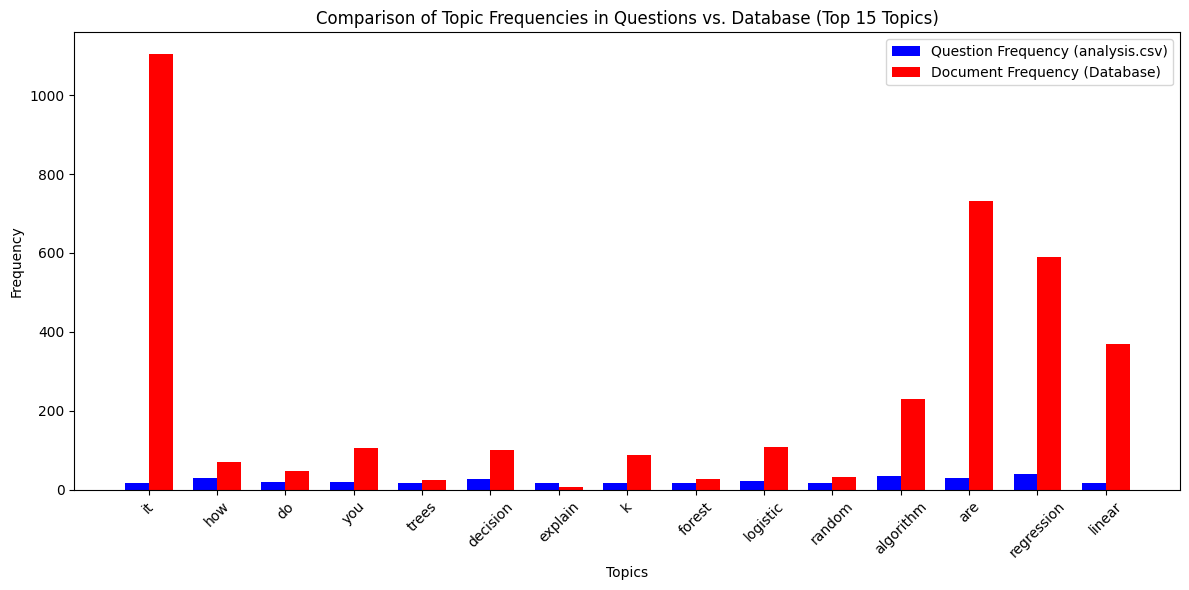

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from collections import Counter
import re

# Database configuration
POSTGRES_CONFIG = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "Prayarth7@",
    "host": "localhost",
    "port": "5432",
}

# Step 1: Load the analysis.csv file
df = pd.read_csv("analysis.csv")

# Step 2: Extract keywords from questions (basic approach)
def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    # Basic filtering to exclude stop words and focus on technical terms
    stop_words = set(["what", "is", "the", "of", "a", "in", "and", "for", "to"])
    keywords = [word for word in words if word not in stop_words]
    return keywords

# Extract keywords from all questions
all_keywords = []
for question in df["question"]:  # Adjusted the column name to match the provided data
    all_keywords.extend(extract_keywords(question))

# Count the frequency of each keyword in the analysis.csv file
question_keyword_freq = Counter(all_keywords)

# Step 3: Connect to PostgreSQL and fetch document counts
def fetch_document_counts():
    document_keyword_freq = Counter()
    try:
        conn = psycopg2.connect(**POSTGRES_CONFIG)
        cursor = conn.cursor()
        
        # Query to fetch all texts from the database and extract keywords
        cursor.execute("SELECT text FROM document_embeddings")
        rows = cursor.fetchall()
        
        for row in rows:
            document_text = row[0]
            document_keywords = extract_keywords(document_text)
            document_keyword_freq.update(document_keywords)

    except Exception as e:
        print("Error connecting to database:", e)
    finally:
        if conn:
            cursor.close()
            conn.close()
    
    return document_keyword_freq

# Fetch document keyword frequency from PostgreSQL
document_keyword_freq = fetch_document_counts()

# Step 4: Get the top 15 most common topics from question keywords
top_15_topics = dict(question_keyword_freq.most_common(15))

# Step 5: Prepare data for plotting
common_topics = set(top_15_topics.keys()).intersection(document_keyword_freq.keys())
question_freq = [top_15_topics[topic] for topic in common_topics]
document_freq = [document_keyword_freq[topic] for topic in common_topics]

# Step 6: Plot the comparative bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(common_topics))

# Blue bar for question frequency
plt.bar(index, question_freq, bar_width, color='blue', label='Question Frequency (analysis.csv)')

# Red bar for document frequency from PostgreSQL database
plt.bar([i + bar_width for i in index], document_freq, bar_width, color='red', label='Document Frequency (Database)')

plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Comparison of Topic Frequencies in Questions vs. Database (Top 15 Topics)')
plt.xticks([i + bar_width / 2 for i in index], list(common_topics), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


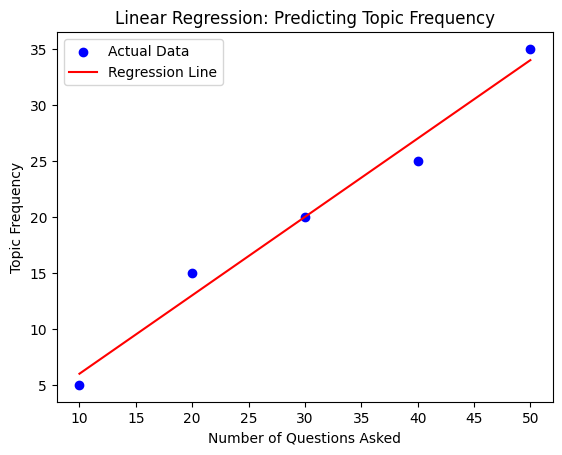

Predicted Topic Frequency for future questions: [41. 48. 55.]


/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data: Number of questions (X) vs Topic Frequency (Y)
# X: Number of questions asked in a period
# Y: Frequency of a topic being asked (like in 'analysis.csv')
data = {
    'questions_asked': [10, 20, 30, 40, 50],  # Example data
    'topic_frequency': [5, 15, 20, 25, 35]    # Example data
}

df = pd.DataFrame(data)

# Independent variable (X) and dependent variable (Y)
X = df[['questions_asked']]  # Features
Y = df['topic_frequency']    # Target variable

# Create the model and fit it
model = LinearRegression()
model.fit(X, Y)

# Make predictions
predictions = model.predict(X)

# Visualize the results
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Number of Questions Asked')
plt.ylabel('Topic Frequency')
plt.title('Linear Regression: Predicting Topic Frequency')
plt.legend()
plt.show()

# Predict future values
future_questions = np.array([[60], [70], [80]])  # Example of future questions
future_predictions = model.predict(future_questions)
print(f"Predicted Topic Frequency for future questions: {future_predictions}")


# Naive Bayes for classification

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load and Clean the Data
file_path = '/home/ak/sem3_all_codes/Be_Kushal_ai/combined_file.csv'
df = pd.read_csv(file_path)

# Identify and remove low-sample classes
class_distribution = df['chapter'].value_counts()
low_sample_classes = class_distribution[class_distribution < 2].index
df_cleaned = df[~df['chapter'].isin(low_sample_classes)]

# Handle missing values in the 'sentence' column
df_cleaned['sentence'] = df_cleaned['sentence'].fillna("")  # Replace NaN with empty string

# Extract features and labels
sentences = df_cleaned['sentence']  # Text data
chapters = df_cleaned['chapter']    # Labels (categories)

# Step 2: Prepare the Data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, chapters, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Step 4: Evaluate the Model
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

# Step 5: Build a Prediction Function
def predict_topic(question):
    """
    Predict the topic label for a given question.
    :param question: A string containing the question or text.
    :return: Predicted topic label.
    """
    question_tfidf = tfidf_vectorizer.transform([question])  # Transform the input question using TF-IDF
    predicted_label = nb_model.predict(question_tfidf)      # Predict the label
    return predicted_label[0]                               # Return the label

# Example Usage
print("Model is ready to predict topics.")
example_question = "What is the role of data cleaning in machine learning?"
predicted_topic = predict_topic(example_question)
print(f"Predicted topic for the question: '{example_question}' is: '{predicted_topic}'")


Accuracy: 27.63%

Classification Report:
                                                                  precision    recall  f1-score   support

                                   100-days-of-machine-learning       0.00      0.00      0.00         3
     7-major-challenges-faced-by-machine-learning-professionals       0.00      0.00      0.00         2
                               applications-of-machine-learning       1.00      0.33      0.50         3
                       backward-elimination-in-machine-learning       0.00      0.00      0.00         2
                   classification-algorithm-in-machine-learning       0.00      0.00      0.00         3
                      collaborative-learning-federated-learning       0.00      0.00      0.00         1
                                    data-cleansing-introduction       0.00      0.00      0.00         5
                            data-preprocessing-machine-learning       0.00      0.00      0.00         8
       deplo

/tmp/ipykernel_11501/1526859899.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentence'] = df_cleaned['sentence'].fillna("")  # Replace NaN with empty string
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

/tmp/ipykernel_11501/4069511264.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentence'] = df_cleaned['sentence'].fillna("")  # Replace NaN with empty string
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control thi

Accuracy: 27.63%

Classification Report:
                                                                  precision    recall  f1-score   support

                                   100-days-of-machine-learning       0.00      0.00      0.00         3
     7-major-challenges-faced-by-machine-learning-professionals       0.00      0.00      0.00         2
                               applications-of-machine-learning       1.00      0.33      0.50         3
                       backward-elimination-in-machine-learning       0.00      0.00      0.00         2
                   classification-algorithm-in-machine-learning       0.00      0.00      0.00         3
                      collaborative-learning-federated-learning       0.00      0.00      0.00         1
                                    data-cleansing-introduction       0.00      0.00      0.00         5
                            data-preprocessing-machine-learning       0.00      0.00      0.00         8
       deplo

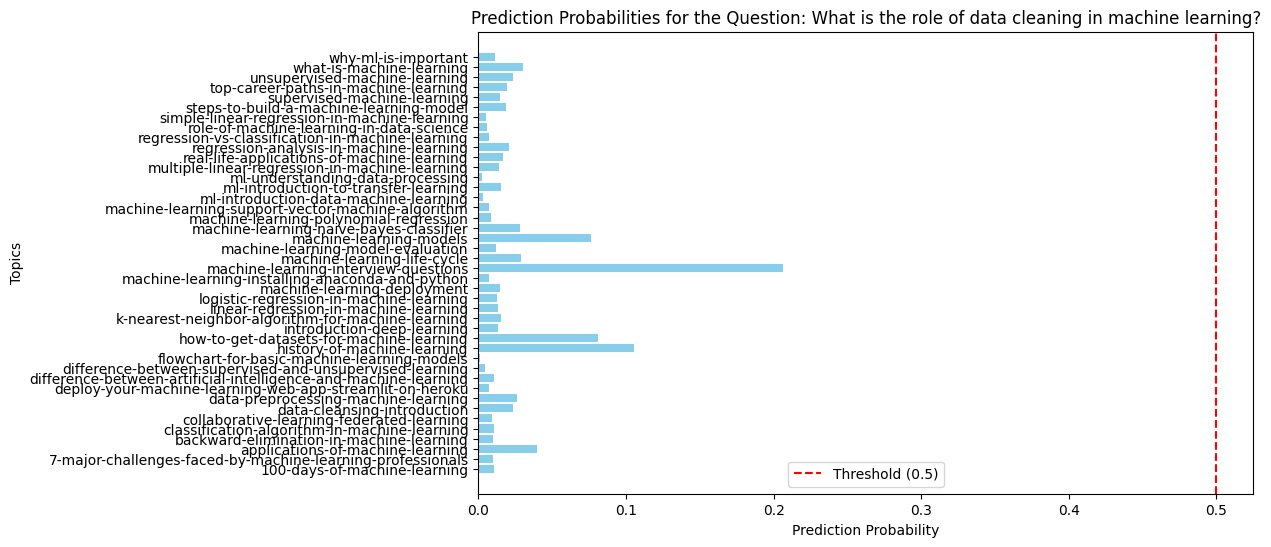

Predicted topic for the question: 'What is the role of data cleaning in machine learning?' is: 'machine-learning-interview-questions'


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load and Clean the Data
file_path = '/home/ak/sem3_all_codes/Be_Kushal_ai/combined_file.csv'

df = pd.read_csv(file_path)

# Identify and remove low-sample classes
class_distribution = df['chapter'].value_counts()
low_sample_classes = class_distribution[class_distribution < 2].index
df_cleaned = df[~df['chapter'].isin(low_sample_classes)]

# Handle missing values in the 'sentence' column
df_cleaned['sentence'] = df_cleaned['sentence'].fillna("")  # Replace NaN with empty string

# Extract features and labels
sentences = df_cleaned['sentence']  # Text data
chapters = df_cleaned['chapter']    # Labels (categories)

# Step 2: Prepare the Data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, chapters, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 3: Train the Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Step 4: Evaluate the Model
y_pred = nb_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

# Step 5: Prediction Function with Visualization
def predict_topic_with_plot(question):
    """
    Predict the topic label for a given question and plot the prediction probabilities.
    :param question: A string containing the question or text.
    """
    # Transform the input question using TF-IDF
    question_tfidf = tfidf_vectorizer.transform([question])
    
    # Get prediction probabilities for all classes
    probabilities = nb_model.predict_proba(question_tfidf)[0]
    labels = nb_model.classes_  # Get the class labels
    
    # Predict the most likely label
    predicted_label = nb_model.predict(question_tfidf)[0]
    
    # Plot the probabilities
    plt.figure(figsize=(10, 6))
    plt.barh(labels, probabilities, color='skyblue')
    plt.xlabel("Prediction Probability")
    plt.ylabel("Topics")
    plt.title(f"Prediction Probabilities for the Question: {question}")
    plt.axvline(x=0.5, color='red', linestyle='--', label="Threshold (0.5)")
    plt.legend()
    plt.show()
    
    # Return the predicted label
    return predicted_label

# Example Usage
print("Model is ready to predict topics.")
example_question = "What is the role of data cleaning in machine learning?"
predicted_topic = predict_topic_with_plot(example_question)
print(f"Predicted topic for the question: '{example_question}' is: '{predicted_topic}'")


# Clustering of embeddings vector

In [25]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
file_path = '/home/ak/sem3_all_codes/Be_Kushal_ai/combined_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 3: Preprocess the data
# Remove rows with missing sentences
df = df.dropna(subset=['sentence'])

# Clean the sentences (remove special characters, convert to lowercase)
df['cleaned_sentence'] = df['sentence'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Encode the 'chapter' column into numerical labels
df['chapter_label'] = pd.factorize(df['chapter'])[0]

# Step 4: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = tfidf.fit_transform(df['cleaned_sentence']).toarray()  # Convert sentences to TF-IDF vectors
y = df['chapter_label']  # Use the encoded chapter labels as target

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Predict for new user queries
def classify_query(query):
    query_cleaned = query.lower().replace(r'[^a-zA-Z\s]', '', regex=True)  # Clean the query
    query_vectorized = tfidf.transform([query_cleaned])  # Vectorize the query
    predicted_label = model.predict(query_vectorized)  # Predict the label
    return df['chapter'].iloc[predicted_label[0]]  # Map the label back to the chapter

# Test with a new query
new_query = "What is overfitting in machine learning?"
predicted_chapter = classify_query(new_query)
print("Predicted Chapter:", predicted_chapter)


Accuracy: 0.1347517730496454
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         2
          21       0.00     

/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TypeError: str.replace() takes no keyword arguments

In [27]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import re  # For regex operations
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
file_path = '/home/ak/sem3_all_codes/Be_Kushal_ai/combined_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 3: Preprocess the data
# Remove rows with missing sentences
df = df.dropna(subset=['sentence'])

# Clean the sentences (remove special characters, convert to lowercase)
df['cleaned_sentence'] = df['sentence'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Encode the 'chapter' column into numerical labels
df['chapter_label'] = pd.factorize(df['chapter'])[0]

# Step 4: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = tfidf.fit_transform(df['cleaned_sentence']).toarray()  # Convert sentences to TF-IDF vectors
y = df['chapter_label']  # Use the encoded chapter labels as target

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Predict for new user queries
def classify_query(query):
    # Use re.sub for regex-based replacement
    query_cleaned = re.sub(r'[^a-zA-Z\s]', '', query.lower())  # Clean the query
    query_vectorized = tfidf.transform([query_cleaned])  # Vectorize the query
    predicted_label = model.predict(query_vectorized)  # Predict the label
    return df['chapter'].iloc[predicted_label[0]]  # Map the label back to the chapter

# Test with a new query
new_query = "What is overfitting in machine learning?"
predicted_chapter = classify_query(new_query)
print("Predicted Chapter:", predicted_chapter)


Accuracy: 0.1347517730496454
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         2
          21       0.00     

/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1347517730496454
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        11
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         2
          21       0.00     

/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ak/ML_chatbot/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/hom

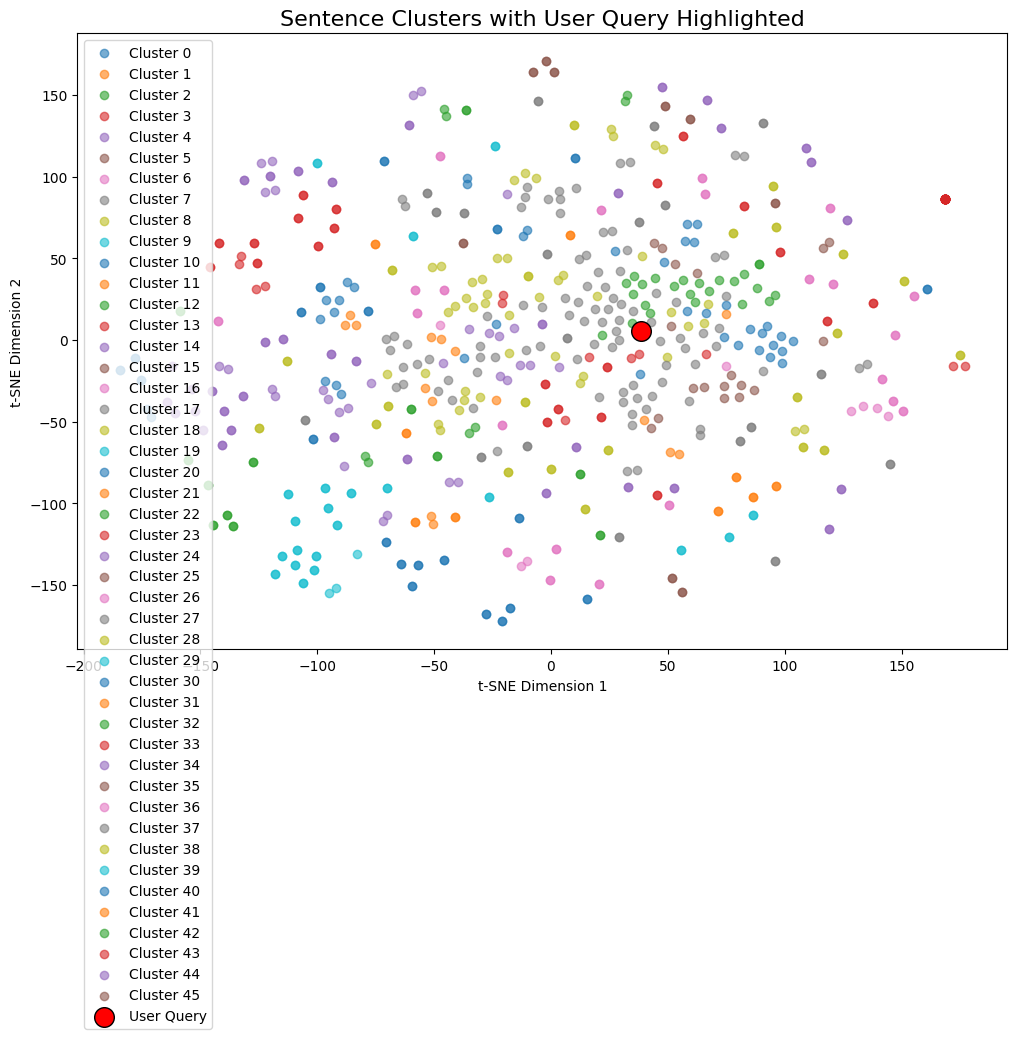

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re  # For regex operations
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/home/ak/sem3_all_codes/Be_Kushal_ai/combined_file.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Preprocess the data
# Remove rows with missing sentences
df = df.dropna(subset=['sentence'])

# Clean the sentences (remove special characters, convert to lowercase)
df['cleaned_sentence'] = df['sentence'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.lower()

# Encode the 'chapter' column into numerical labels
df['chapter_label'] = pd.factorize(df['chapter'])[0]

# Step 3: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X = tfidf.fit_transform(df['cleaned_sentence']).toarray()  # Convert sentences to TF-IDF vectors
y = df['chapter_label']  # Use the encoded chapter labels as target

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Predict for new user queries
def classify_query(query):
    # Clean the query
    query_cleaned = re.sub(r'[^a-zA-Z\s]', '', query.lower())
    query_vectorized = tfidf.transform([query_cleaned]).toarray()  # Vectorize the query
    predicted_label = model.predict(query_vectorized)  # Predict the label
    return df['chapter'].iloc[predicted_label[0]]  # Map the label back to the chapter

# Example query
new_query = "What is overfitting in machine learning?"
predicted_chapter = classify_query(new_query)
print("Predicted Chapter:", predicted_chapter)

# Step 8: Visualize clusters and query position
# Reduce dimensionality of TF-IDF vectors
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

# Apply t-SNE with adjusted perplexity
n_samples = X.shape[0]
perplexity = min(30, n_samples // 3)  # Ensure perplexity is less than the number of samples
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# Perform KMeans clustering
n_clusters = len(df['chapter'].unique())  # Number of unique chapters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(12, 8))
for cluster_id in range(n_clusters):
    plt.scatter(
        X_tsne[clusters == cluster_id, 0],  # X-coordinates of this cluster
        X_tsne[clusters == cluster_id, 1],  # Y-coordinates of this cluster
        label=f"Cluster {cluster_id}",
        alpha=0.6,
    )

# Highlight the query in the plot
query_cleaned = re.sub(r'[^a-zA-Z\s]', '', new_query.lower())  # Clean the query
query_vectorized = tfidf.transform([query_cleaned]).toarray()  # Vectorize the query
query_pca = pca.transform(query_vectorized)  # Apply PCA
query_tsne = tsne.fit_transform(np.vstack([X_pca, query_pca]))[-1]  # Add query to the t-SNE space
plt.scatter(query_tsne[0], query_tsne[1], color="red", label="User Query", s=200, edgecolor='k')

# Add plot details
plt.title("Sentence Clusters with User Query Highlighted", fontsize=16)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()
